<a href="https://colab.research.google.com/github/DrPaulaEkene/Binary_Classification_Of_Uterine-Myoma_ltrasound_Via_ResNet50_And_MobileNet/blob/main/Final_Project_Uterine_Myoma_(Uterine_fibroids)_Ultrasound_image_classification_with_ResNet50_and_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Binary Classification of Uterine Fibroid Using ResNet50 and MobileNetv3

**This notebook focuses on the Comparative Analysis of the classification performance of Deep Learning Architectures for Uterine Myoma/fibroids: The models explored by this work are Custom ResNet50 vs. Mobile NetV3**

**Import needed libraries**

In [1]:
# Import needed libraries
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Concatenate, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from sklearn.model_selection import train_test_split
from PIL import Image

Import module and mount the drive

In [2]:
# Import the drive module
from google.colab import drive

# Mount the Google Drive to the Colab environment.
drive.mount('/content/drive')

Mounted at /content/drive


Exploratory data analysis

In [3]:
# Create the data file paths/directories
# Define the base directory
data_directory = "/content/drive/MyDrive/UF_dataset"

# Define directories for training and testing data
train_directory = "/content/drive/MyDrive/UF_dataset/train"
test_directory = "/content/drive/MyDrive/UF_dataset/test"

In [4]:
# Print the contents of the base directory

# Function to print contents of a directory
def print_directory_contents(directory, subdirs):
    for subdir in subdirs:
        subdir_path = os.path.join(directory, subdir)
        if os.path.exists(subdir_path):
            print(f"\nContents of {subdir_path}:")
            for item in os.listdir(subdir_path):
                print(item)
        else:
            print(f"\n{subdir_path} does not exist.")

print("Contents of the base directory:")
print(os.listdir(data_directory))

# Print the contents of the training directory
print("\nContents of the training directory:")
print(os.listdir(train_directory))
print_directory_contents(train_directory, ['NUF', 'UF'])

# Print the contents of the testing directory
print("\nContents of the testing directory:")
print(os.listdir(test_directory))
print_directory_contents(test_directory, ['NUF', 'UF'])


Contents of the base directory:
['train', 'test']

Contents of the training directory:
['UF', 'NUF']

Contents of /content/drive/MyDrive/UF_dataset/train/NUF:
1.2.826.0.1.3680043.2.461.11229758.3149164383.jpg
1.2.826.0.1.3680043.2.461.11229758.2804335900.jpg
1.2.826.0.1.3680043.2.461.11229758.2909068436.jpg
1.2.826.0.1.3680043.2.461.11229758.2709081616.jpg
1.2.826.0.1.3680043.2.461.11229758.1427511541.jpg
1.2.826.0.1.3680043.2.461.11229759.1183509096.jpg
1.2.826.0.1.3680043.2.461.11229756.3113893898.jpg
1.2.826.0.1.3680043.2.461.11229756.2388392267.jpg
1.2.826.0.1.3680043.2.461.11229787.1438444062.jpg
1.2.826.0.1.3680043.2.461.11229758.3256349608.jpg
1.2.826.0.1.3680043.2.461.11229756.3714980984.jpg
1.2.826.0.1.3680043.2.461.11229758.208563029.jpg
1.2.826.0.1.3680043.2.461.11229758.4259267063.jpg
1.2.826.0.1.3680043.2.461.11229787.2145906767.jpg
1.2.826.0.1.3680043.2.461.11229757.2783613826.jpg
1.2.826.0.1.3680043.2.461.11229789.2312397854.jpg
1.2.826.0.1.3680043.2.461.11229789.3079304

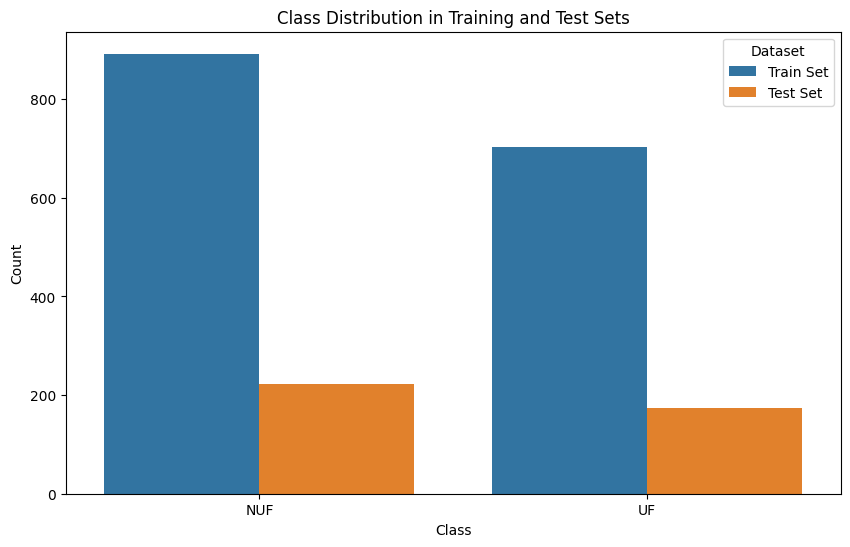

In [5]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define directories
data_directory = "/content/drive/MyDrive/UF_dataset"
train_directory = "/content/drive/MyDrive/UF_dataset/train"
test_directory = "/content/drive/MyDrive/UF_dataset/test"

# Get the class names from both the training and test directories
train_classes = os.listdir(train_directory)
test_classes = os.listdir(test_directory)

# Combine and deduplicate the class names
classes = sorted(set(train_classes) | set(test_classes))

# Count the number of samples in each class for both training and test sets
train_class_counts = [len(os.listdir(os.path.join(train_directory, cls))) if cls in train_classes else 0 for cls in classes]
test_class_counts = [len(os.listdir(os.path.join(test_directory, cls))) if cls in test_classes else 0 for cls in classes]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Class': classes,
    'Train Set': train_class_counts,
    'Test Set': test_class_counts
})

# Melt the DataFrame to have a long format suitable for Seaborn's barplot
df_melted = df.melt(id_vars='Class', var_name='Dataset', value_name='Count')

# Plot the combined class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Count', hue='Dataset', data=df_melted)
plt.title('Class Distribution in Training and Test Sets')
plt.show()


<ipython-input-6-f5e470423d8e>:40: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  barplot = sns.barplot(x='Class', y='Count', hue='Dataset', data=df_melted, palette=palette)


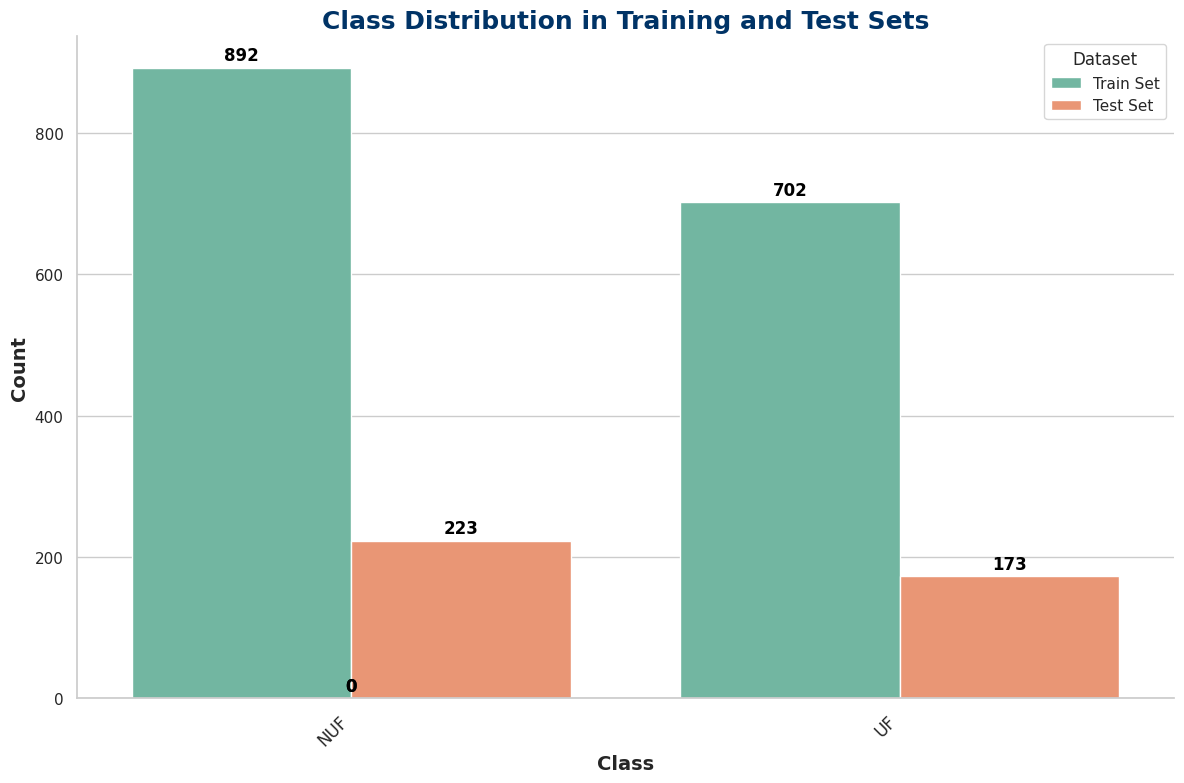

In [6]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define directories
data_directory = "/content/drive/MyDrive/UF_dataset"
train_directory = "/content/drive/MyDrive/UF_dataset/train"
test_directory = "/content/drive/MyDrive/UF_dataset/test"

# Get the class names from both the training and test directories
train_classes = os.listdir(train_directory)
test_classes = os.listdir(test_directory)

# Combine the class names
classes = sorted(set(train_classes) | set(test_classes))

# Count the number of samples in each class for both sets
train_class_counts = [len(os.listdir(os.path.join(train_directory, cls))) if cls in train_classes else 0 for cls in classes]
test_class_counts = [len(os.listdir(os.path.join(test_directory, cls))) if cls in test_classes else 0 for cls in classes]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Class': classes,
    'Train Set': train_class_counts,
    'Test Set': test_class_counts
})

# Melt the DataFrame to have a long format suitable for Seaborn's barplot
df_melted = df.melt(id_vars='Class', var_name='Dataset', value_name='Count')

# Set up the aesthetic bar plot
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Choose a color palette
palette = sns.color_palette("Set2")

# Create the bar plot
barplot = sns.barplot(x='Class', y='Count', hue='Dataset', data=df_melted, palette=palette)

# Add title and labels with custom fonts
plt.title('Class Distribution in Training and Test Sets', fontsize=18, fontweight='bold', color='#003366')
plt.xlabel('Class', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Rotate x-axis labels
plt.xticks(rotation=45, ha="right", fontsize=12)

# Annotate with count values
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points',
                     fontsize=12, fontweight='bold', color='black')

# despine and show the plot
sns.despine()
plt.tight_layout()
plt.show()

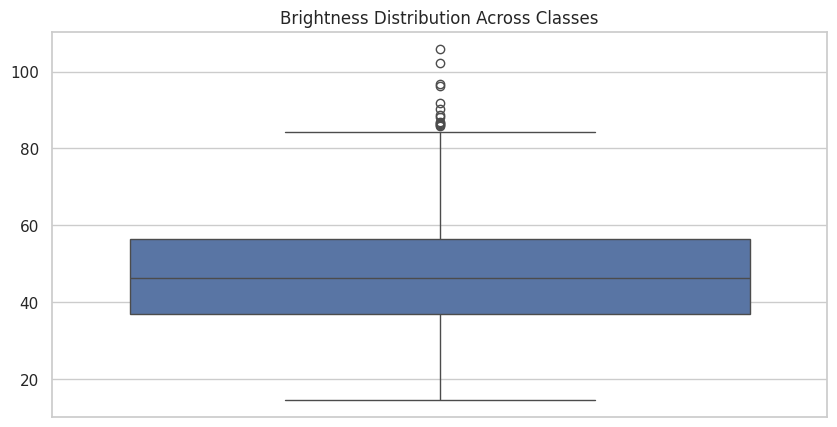

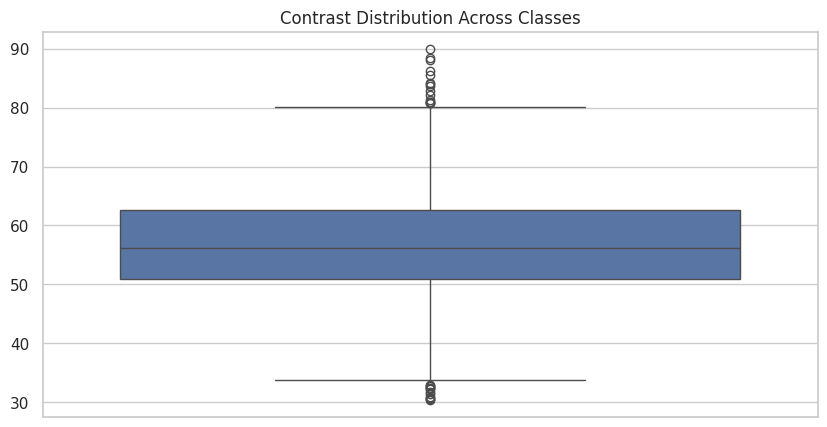

In [7]:
def calculate_brightness(img):
    return np.mean(img)

def calculate_contrast(img):
    return img.std()

brightness = []
contrast = []
for cls in classes:
    cls_path = os.path.join(train_directory, cls)
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        img = Image.open(img_path).convert('L')
        img_array = np.array(img)
        brightness.append(calculate_brightness(img_array))
        contrast.append(calculate_contrast(img_array))

plt.figure(figsize=(10, 5))
sns.boxplot(data=brightness)
plt.title('Brightness Distribution Across Classes')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=contrast)
plt.title('Contrast Distribution Across Classes')
plt.show()


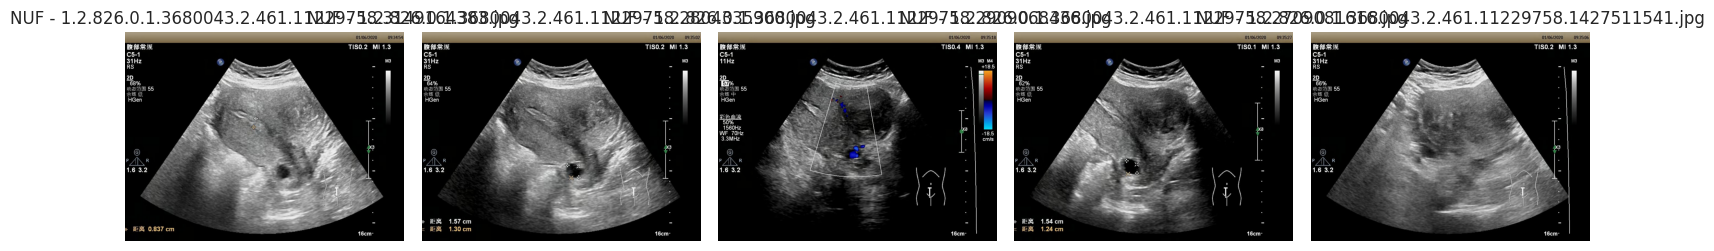

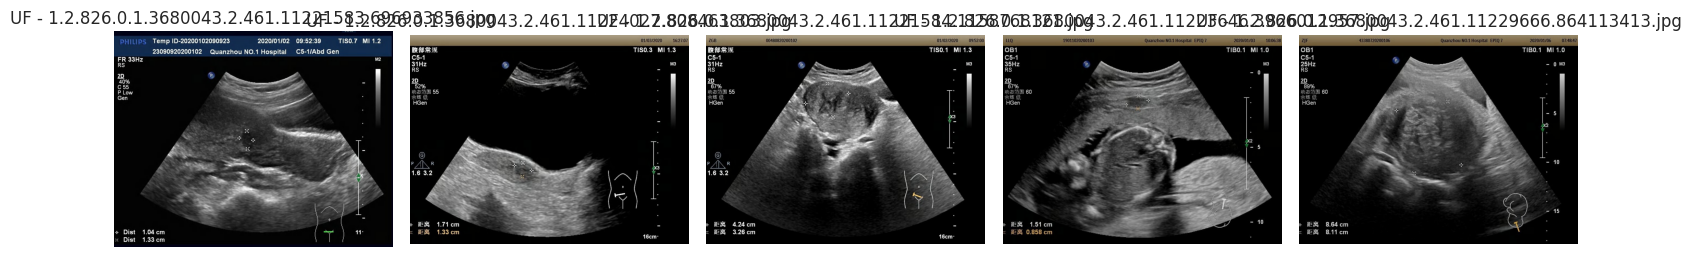

In [11]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def plot_images(main_directory, subfolders):
    # Iterate through each subfolder
    for subfolder in subfolders:
        directory = os.path.join(main_directory, subfolder)

        # Get the list of image files in the subfolder
        files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

        if len(files) == 0:
            print(f"No images found in {subfolder} folder")
            continue

        # Plot up to 5 images from the subfolder
        fig, axes = plt.subplots(1, 5, figsize=(15, 3))
        axes = axes.flatten()

        for i, file in enumerate(files[:5]):
            # Load and plot the image
            img_path = os.path.join(directory, file)
            img = Image.open(img_path)
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(f"{subfolder} - {file}")

        plt.tight_layout()
        plt.show()

# Define the subfolders for NUF and UF
subfolders = ['NUF', 'UF']

# Plot 5 images from each subfolder in the train directory
plot_images(train_directory, subfolders)


In [10]:
from collections import defaultdict
import numpy as np

def get_image_shapes(directory):
    shapes = defaultdict(int)
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                with Image.open(img_path) as img:
                    shapes[img.size] += 1
    return shapes

train_shapes = get_image_shapes(train_directory)
test_shapes = get_image_shapes(test_directory)

print("Training set image shapes:", dict(train_shapes))
print("Testing set image shapes:", dict(test_shapes))


Training set image shapes: {(1028, 796): 95, (1024, 768): 1389, (1020, 772): 15, (1026, 766): 2, (768, 576): 11, (1138, 846): 61, (994, 766): 1, (1022, 786): 1, (720, 576): 4, (1136, 852): 3, (1920, 1080): 1, (730, 666): 1, (1160, 844): 1, (704, 666): 1, (1280, 872): 3, (1034, 794): 5}
Testing set image shapes: {(1024, 768): 370, (1028, 796): 6, (1138, 846): 15, (720, 576): 2, (768, 552): 1, (804, 632): 1, (1020, 772): 1}


Preprocessing with imageDataGenerator

Image classification with ResNet50

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
data_directory = "/content/drive/MyDrive/UF_dataset"
train_directory = "/content/drive/MyDrive/UF_dataset/train"
test_directory = "/content/drive/MyDrive/UF_dataset/test"

# Create an ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Load pre-trained ResNet50 model (without top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1, activation='sigmoid')(x)

# Create model
model1 = tf.keras.Model(inputs=base_model.input, outputs=x)

# Compile model
model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model1.summary()

# Train the model
historyRes = model1.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

# Evaluate the model
loss, accuracy = model1.evaluate(test_generator)
print(f'ResNet50 Test Accuracy: {accuracy:.2f}')


Found 1594 images belonging to 2 classes.
Found 396 images belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 58s 829ms/step - accuracy: 0.5977 - loss: 0.6782 - val_accuracy: 0.6187 - val_loss: 0.6268
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 64s 587ms/step - accuracy: 0.6250 - loss: 0.6560 - val_accuracy: 0.7929 - val_loss: 0.5879
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 609ms/step - accuracy: 0.6722 - loss: 0.6304 - val_accuracy: 0.7980 - val_loss: 0.5568
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 598ms/step - accuracy: 0.6889 - loss: 0.6140 - val_accuracy: 0.7828 - val_loss: 0.5312
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 664ms/step - accuracy: 0.6918 - loss: 0.5989 - val_accuracy: 0.8056 - val_loss: 0.5405
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 596ms/step - accuracy: 0.7378 - loss: 0.5893 - val_accuracy: 0.8434 - val_loss: 0.4968
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 584ms/step - accuracy: 0.6997 - loss: 0.5837 - val_accuracy: 0.8056 - val_loss: 0.5199
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 623ms/step - accuracy: 0.7233 - loss: 0.5828 - val_accuracy: 0.838

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 458ms/step
Sensitivity (Recall): 0.51
Specificity: 0.48
Precision: 0.43
F1 Score: 0.47
Harmonic Mean of Precision and Recall: 0.47
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 286ms/step


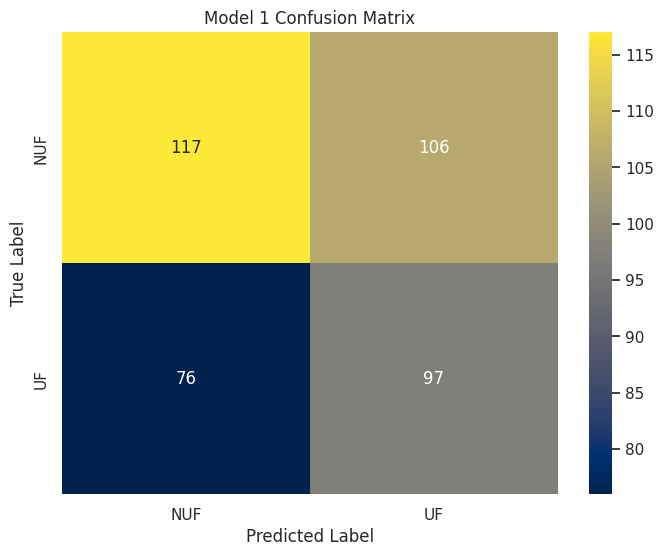

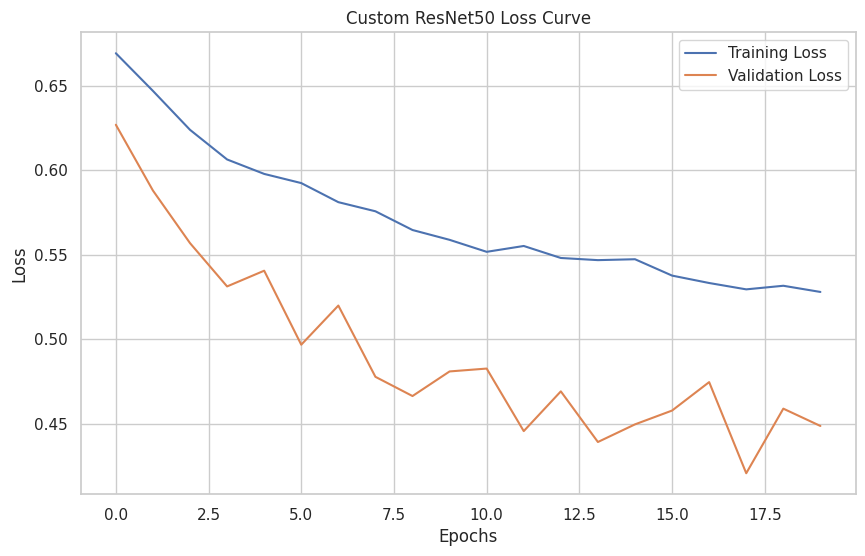

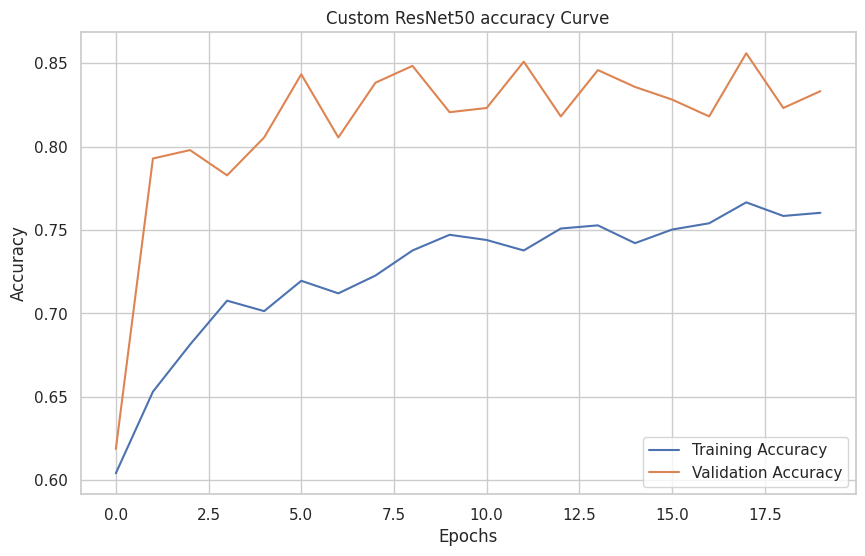

In [13]:
# Evaluate the Custom ResNet Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
import tensorflow as tf

def evaluate_model(model, test_generator, class_labels):
    """
    Evaluate the model on test data and print various metrics.

    Parameters:
    - model: The trained Keras model.
    - test_generator: Keras ImageDataGenerator for test data.
    - class_labels: List of class labels.
    """
    # Get true labels and predictions
    y_true = test_generator.classes
    y_pred_prob = model.predict(test_generator, verbose=1)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()

    # Compute metrics
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = recall_score(y_true, y_pred)  # Recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    harmonic_mean = (2 * precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0

    # Print metrics
    print(f'Sensitivity (Recall): {sensitivity:.2f}')
    print(f'Specificity: {specificity:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'Harmonic Mean of Precision and Recall: {harmonic_mean:.2f}')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(model, test_generator, class_labels, title="Confusion Matrix"):
    """
    Plots the confusion matrix for a given model and test data.

    Parameters:
    - model: Trained model to evaluate.
    - test_generator: The generator for the test data.
    - class_labels: List of class labels for the confusion matrix axes.
    - title: Title of the plot.
    """
    # Predict the classes
    y_pred_prob = model.predict(test_generator, verbose=1)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()

    # Get the true labels
    y_true = test_generator.classes

    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

evaluate_model(model1, test_generator, ['NUF', 'UF'])

plot_confusion_matrix(model1, test_generator, ['NUF', 'UF'],title="Model 1 Confusion Matrix")

# Function to plot loss curve
def plot_loss_curve(history, title='Training and Validation Loss'):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Function to plot accuracy curve with a customizable title
def plot_accuracy_curve(history, title='Training and Validation Accuracy'):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot loss and accuracy curves
plot_loss_curve(historyRes, title='Custom ResNet50 Loss Curve')
plot_accuracy_curve(historyRes,title='Custom ResNet50 accuracy Curve' )

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step


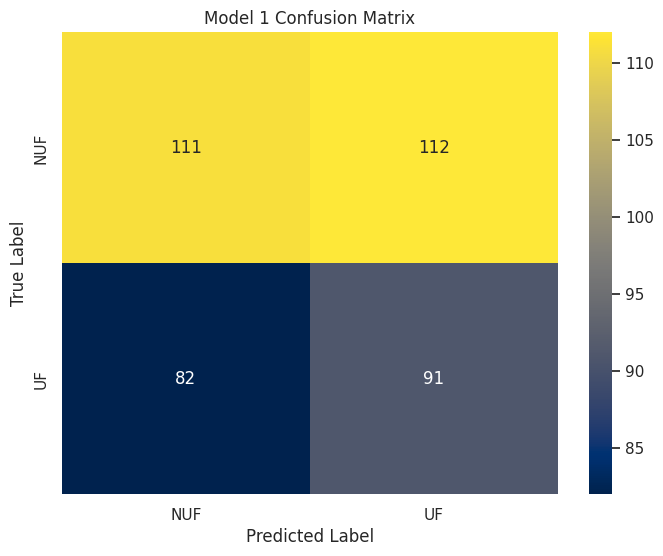

In [14]:
plot_confusion_matrix(model1, test_generator, ['NUF', 'UF'],title="Model 1 Confusion Matrix")

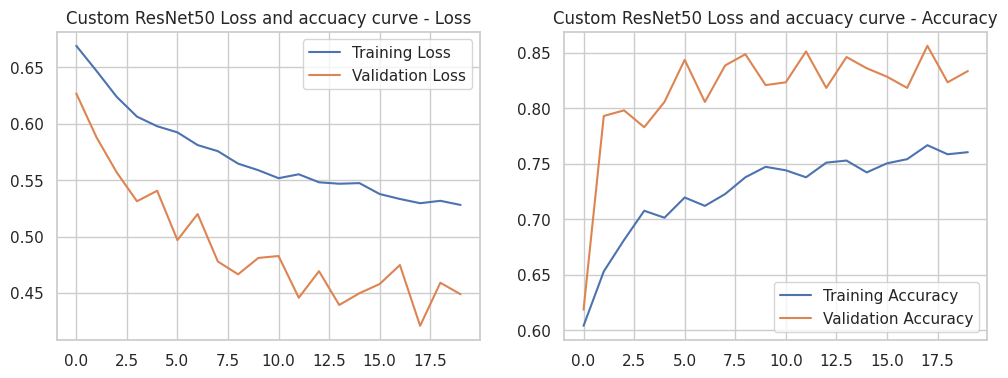

In [15]:
# Function to plot loss curve
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.show()

# Plot loss and accuracy curves
plot_history(historyRes, title='Custom ResNet50 Loss and accuacy curve')

In [16]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback

# Define a custom callback to monitor accuracy
class BestAccuracyCallback(Callback):
    def __init__(self):
        super(BestAccuracyCallback, self).__init__()
        self.best_accuracy = 0

    def on_epoch_end(self, epoch, logs=None):
        current_accuracy = logs.get("val_accuracy")
        if current_accuracy and current_accuracy > self.best_accuracy:
            self.best_accuracy = current_accuracy
            print(f"New Best Accuracy: {self.best_accuracy:.4f}")

# Instantiate the custom callback
best_accuracy_callback = BestAccuracyCallback()

# Add 10 more epochs and train the model
historyRes = model1.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[best_accuracy_callback]  # Include the custom callback
)


Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.7876 - loss: 0.5053New Best Accuracy: 0.8333
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 590ms/step - accuracy: 0.7873 - loss: 0.5057 - val_accuracy: 0.8333 - val_loss: 0.4427
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 593ms/step - accuracy: 0.7565 - loss: 0.5262 - val_accuracy: 0.8030 - val_loss: 0.4848
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 671ms/step - accuracy: 0.7544 - loss: 0.5189 - val_accuracy: 0.7904 - val_loss: 0.4962
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 576ms/step - accuracy: 0.7671 - loss: 0.5160 - val_accuracy: 0.7424 - val_loss: 0.5266
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 591ms/step - accuracy: 0.7807 - loss: 0.5139 - val_accuracy: 0.8308 - val_loss: 0.4422
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 625ms/step - accuracy: 0.7586 - loss: 0.5219 - val_accuracy: 0.8258 - val_loss: 0.4456
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 586ms/step - accuracy: 0.7701 - loss: 0.5105 - val_accuracy: 0.8131 - val_loss: 0.47

In [17]:
# Evaluate the model, model1
metrics = model1.evaluate(test_generator)
loss = metrics[0]
accuracy = metrics[1]
print(f'ResNet50 Test Accuracy: {accuracy:.2f}')
print(f'Best Validation Accuracy During Training: {best_accuracy_callback.best_accuracy:.4f}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 239ms/step - accuracy: 0.8137 - loss: 0.4375
ResNet50 Test Accuracy: 0.81
Best Validation Accuracy During Training: 0.8485


In [18]:
evaluate_model(model1, test_generator, ['NUF', 'UF'])

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step
Sensitivity (Recall): 0.57
Specificity: 0.45
Precision: 0.45
F1 Score: 0.50
Harmonic Mean of Precision and Recall: 0.50


**Modify the model further for better results**

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 229ms/step


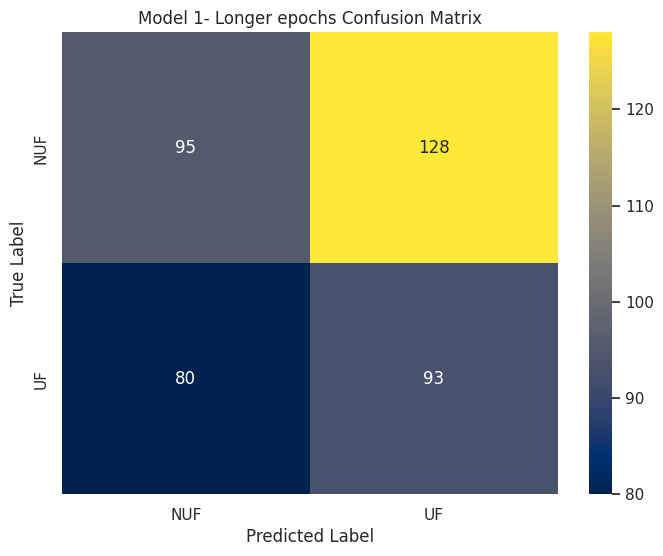

In [19]:
# Evaluate model1 again
plot_confusion_matrix(model1, test_generator, ['NUF', 'UF'],title="Model 1- Longer epochs Confusion Matrix")

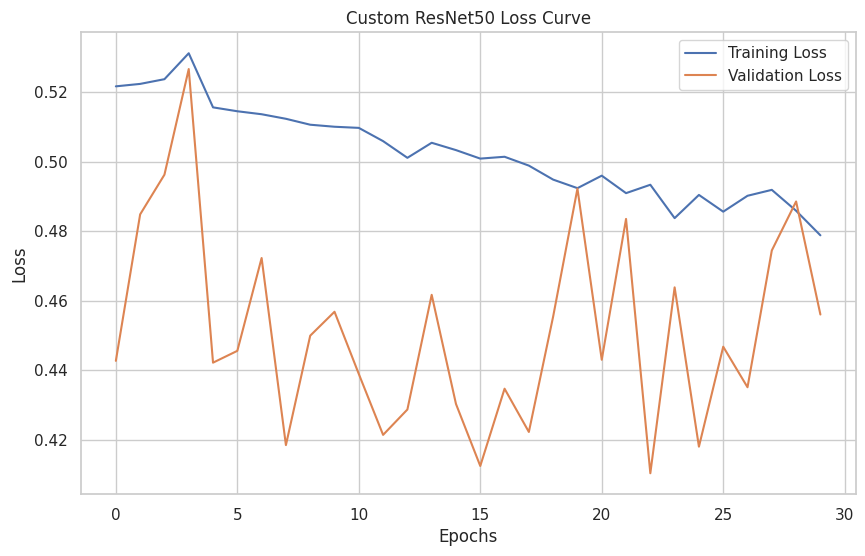

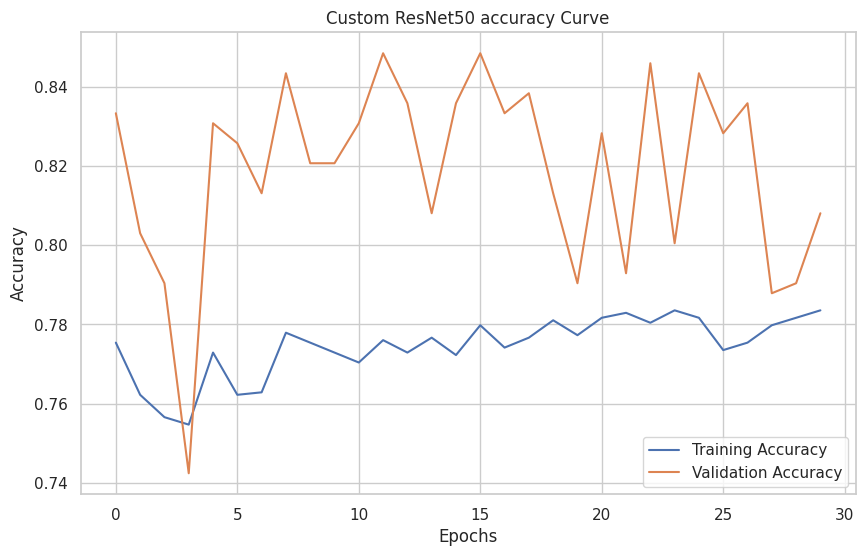

In [20]:
# Plot loss and accuracy curves
plot_loss_curve(historyRes, title='Custom ResNet50 Loss Curve')
plot_accuracy_curve(historyRes,title='Custom ResNet50 accuracy Curve' )

In [21]:
# Unfreeze layers, Model1b

from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load ResNet50 without the top (classification) layer
resnet_with_top = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the top layers (last 10) of the model
for layer in resnet_with_top.layers[-10:]:
    layer.trainable = True

# Add a custom head for binary classification - UF and NUF
model1b = Sequential([
    resnet_with_top,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model1b.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history_with_top = model1b.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
loss, accuracy = model1b.evaluate(test_generator)
print(f'ResNet50 with Top Layer Test Accuracy: {accuracy:.2f}')

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.7694 - loss: 0.4853 - val_accuracy: 0.5631 - val_loss: 1.1327 - learning_rate: 1.0000e-04
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 676ms/step - accuracy: 0.9407 - loss: 0.1672 - val_accuracy: 0.5631 - val_loss: 2.4274 - learning_rate: 1.0000e-04
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 669ms/step - accuracy: 0.9551 - loss: 0.1251 - val_accuracy: 0.5631 - val_loss: 1.0437 - learning_rate: 1.0000e-04
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 676ms/step - accuracy: 0.9743 - loss: 0.0916 - val_accuracy: 0.5631 - val_loss: 1.6883 - learning_rate: 1.0000e-04
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 700ms/step - accuracy: 0.9822 - loss: 0.0501 - val_accuracy: 0.5631 - val_loss: 4.6335 - learning_rate: 1.0000e-04
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 654ms/step - accuracy: 0.9714 - loss: 0.0857 - val_accuracy: 0.5631 - val_loss: 1.3603 - learning_rate: 1.0000e-04
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 680ms/step - accur

In [23]:
evaluate_model(model1b, test_generator, ['NUF', 'UF'])

13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 518ms/step
Sensitivity (Recall): 0.00
Specificity: 1.00
Precision: 0.00
F1 Score: 0.00
Harmonic Mean of Precision and Recall: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 282ms/step


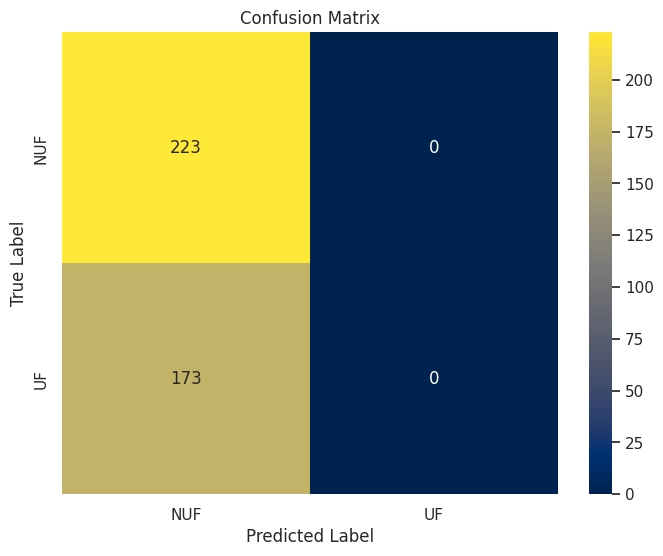

In [24]:
plot_confusion_matrix(model1b, test_generator, ['NUF', 'UF'])

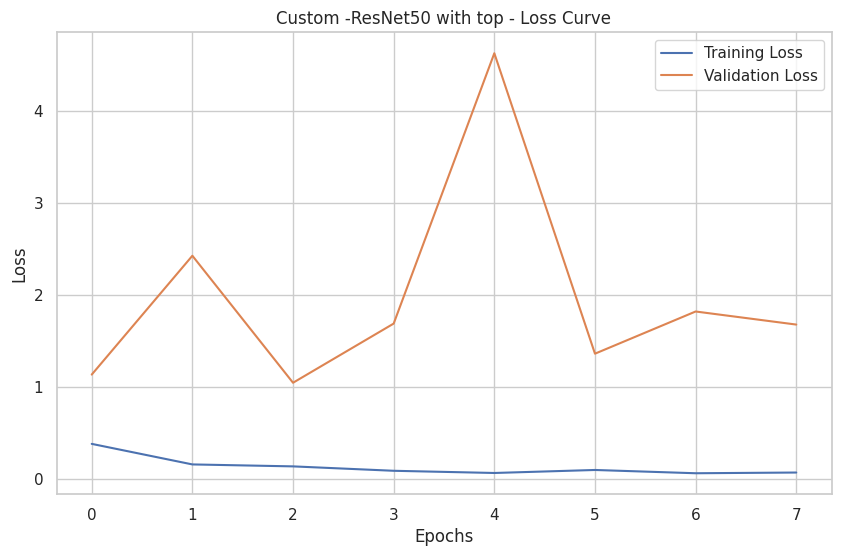

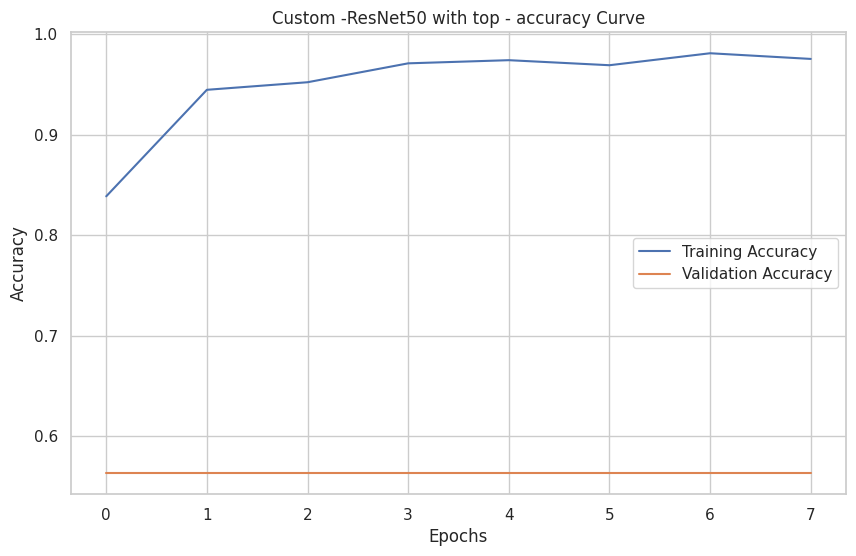

In [25]:
# Plot loss and accuracy curves
plot_loss_curve(history_with_top, title='Custom -ResNet50 with top - Loss Curve')
plot_accuracy_curve(history_with_top,title='Custom -ResNet50 with top - accuracy Curve' )

Add more layers

In [26]:
# Increase nodes by 50%
# Load pre-trained ResNet50 model (without top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

# Create model
model1c = tf.keras.Model(inputs=base_model.input, outputs=x)

# Compile model
model1c.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model1c.summary()

# Train the model
historyRes_layers = model1c.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
loss, accuracy = model1c.evaluate(test_generator)
print(f'ResNet50layers Test Accuracy: {accuracy:.2f}')

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,801,153 (94.61 MB)

 Trainable params: 1,213,441 (4.63 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 61s 907ms/step - accuracy: 0.4948 - loss: 0.8263 - val_accuracy: 0.5631 - val_loss: 0.6695 - learning_rate: 0.0010
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 62s 593ms/step - accuracy: 0.5827 - loss: 0.6989 - val_accuracy: 0.6641 - val_loss: 0.6781 - learning_rate: 0.0010
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 671ms/step - accuracy: 0.5345 - loss: 0.6987 - val_accuracy: 0.6894 - val_loss: 0.6498 - learning_rate: 0.0010
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 589ms/step - accuracy: 0.5769 - loss: 0.6766 - val_accuracy: 0.7904 - val_loss: 0.6287 - learning_rate: 0.0010
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 612ms/step - accuracy: 0.6242 - loss: 0.6569 - val_accuracy: 0.8157 - val_loss: 0.5635 - learning_rate: 0.0010
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 624ms/step - accuracy: 0.6835 - loss: 0.6123 - val_accuracy: 0.8384 - val_loss: 0.4784 - learning_rate: 0.0010
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 597ms/step - accuracy: 0.6868 - loss: 0.

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 460ms/step
Sensitivity (Recall): 0.49
Specificity: 0.52
Precision: 0.44
F1 Score: 0.46
Harmonic Mean of Precision and Recall: 0.46
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step


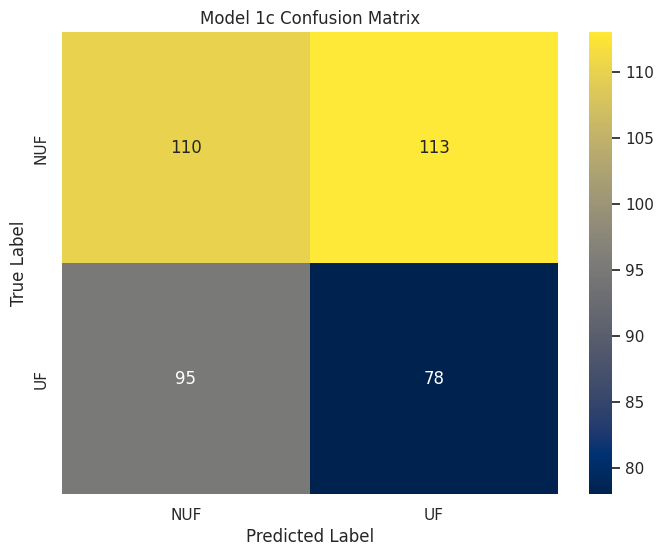

In [27]:
# Evaluate model1c
evaluate_model(model1c, test_generator, ['NUF', 'UF'])
plot_confusion_matrix(model1c, test_generator, ['NUF', 'UF'],title="Model 1c Confusion Matrix")

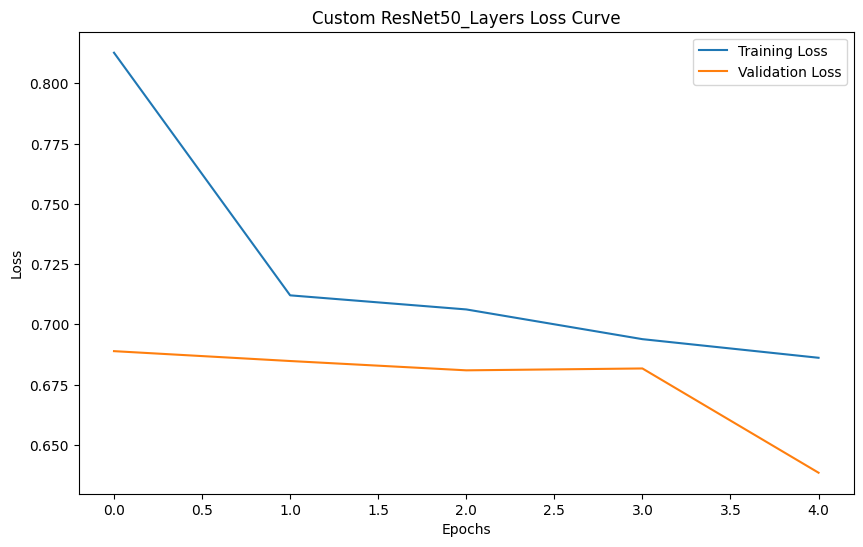

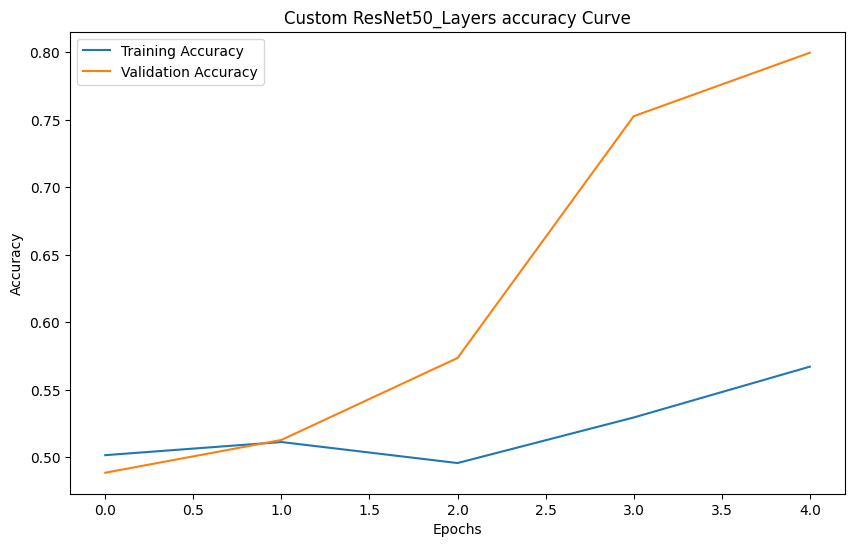

In [ ]:
# Plot loss and accuracy curves
plot_loss_curve(historyRes_layers, title='Custom ResNet50_Layers Loss Curve')
plot_accuracy_curve(historyRes_layers, title='Custom ResNet50_Layers accuracy Curve')

In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# Increase patience levels
#  Adjust the learning rate when the validation loss stops improving


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

# Create model
model1d = tf.keras.Model(inputs=base_model.input, outputs=x)

# Compile model
model1d.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.00001
)

# Set up EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model with callback
historyRes_layer_Lr = model1d.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[reduce_lr, early_stopping, checkpoint]
)

# Evaluate the model
model1d.load_weights('best_model.keras')
loss, accuracy = model1d.evaluate(test_generator)
print(f'ResNet50_Layer Test Accuracy: {accuracy:.2f}')


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 58s 847ms/step - accuracy: 0.4894 - loss: 0.8974 - val_accuracy: 0.5631 - val_loss: 0.6831 - learning_rate: 0.0010
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 67s 614ms/step - accuracy: 0.5055 - loss: 0.7057 - val_accuracy: 0.5631 - val_loss: 0.6846 - learning_rate: 0.0010
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 681ms/step - accuracy: 0.5260 - loss: 0.6980 - val_accuracy: 0.5732 - val_loss: 0.6795 - learning_rate: 0.0010
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 692ms/step - accuracy: 0.5307 - loss: 0.6923 - val_accuracy: 0.5657 - val_loss: 0.6576 - learning_rate: 0.0010
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 610ms/step - accuracy: 0.5650 - loss: 0.6784 - val_accuracy: 0.6389 - val_loss: 0.6277 - learning_rate: 0.0010
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 660ms/step - accuracy: 0.6178 - loss: 0.6615 - val_accuracy: 0.7803 - val_loss: 0.5701 - learning_rate: 0.0010
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 658ms/step - accuracy: 0.6804 - loss: 0.

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 287ms/step
Sensitivity (Recall): 0.43
Specificity: 0.55
Precision: 0.43
F1 Score: 0.43
Harmonic Mean of Precision and Recall: 0.43
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 230ms/step


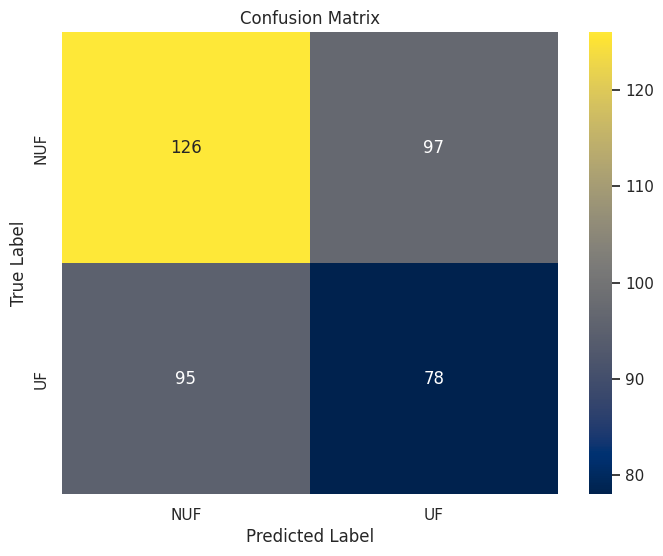

In [31]:
evaluate_model(model1d, test_generator, ['NUF', 'UF'])
plot_confusion_matrix(model1d, test_generator, ['NUF', 'UF'])

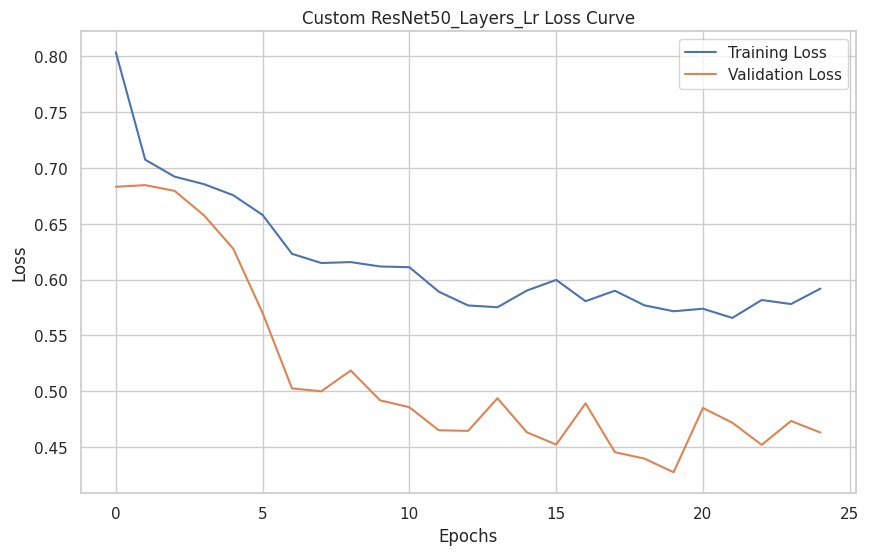

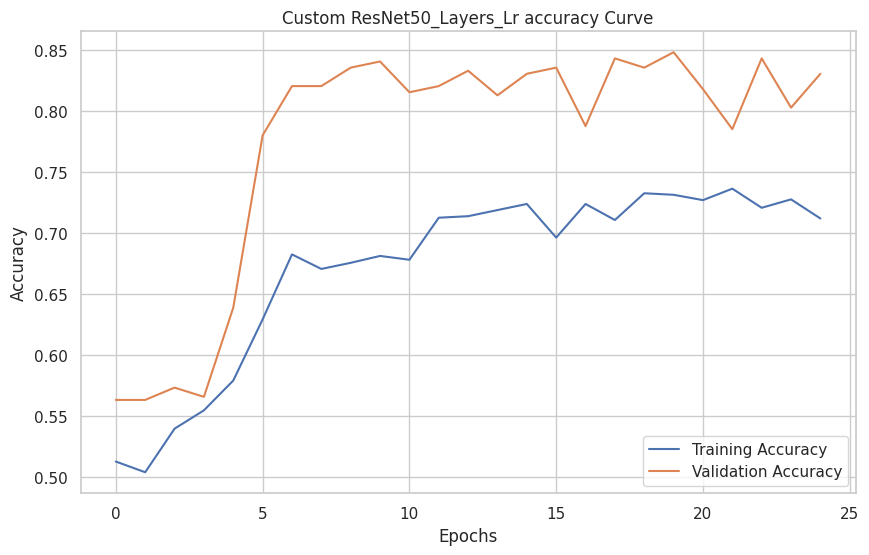

In [32]:
# Plot loss and accuracy curves
plot_loss_curve(historyRes_layer_Lr, title='Custom ResNet50_Layers_Lr Loss Curve')
plot_accuracy_curve(historyRes_layer_Lr, title='Custom ResNet50_Layers_Lr accuracy Curve')

In [33]:
# Balance classes and train with best model so far
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Balance class and train with the model with the highest accuracy so far
class_names = ['NUF', 'UF']
class_indices = train_generator.class_indices

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=list(class_indices.values()),
    y=train_generator.classes
)
class_weight_dict = dict(enumerate(class_weights))

# Set up EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

In [34]:
# Train the model with class weights and callbacks
history_class_bal = model1d.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 52s 765ms/step - accuracy: 0.7263 - loss: 0.5796 - val_accuracy: 0.8333 - val_loss: 0.4543
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 70s 646ms/step - accuracy: 0.7602 - loss: 0.5551 - val_accuracy: 0.8333 - val_loss: 0.4428
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 602ms/step - accuracy: 0.7127 - loss: 0.5794 - val_accuracy: 0.6995 - val_loss: 0.5363
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 585ms/step - accuracy: 0.7502 - loss: 0.5670 - val_accuracy: 0.7828 - val_loss: 0.4871
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 630ms/step - accuracy: 0.7156 - loss: 0.6012 - val_accuracy: 0.7929 - val_loss: 0.4854


In [35]:
# Evaluate the model using the best saved model
model1d.load_weights('best_model.keras')
loss, accuracy = model1d.evaluate(test_generator)
print(f'ResNet50_Class_Balance Test Accuracy: {accuracy:.2f}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 273ms/step - accuracy: 0.8454 - loss: 0.4252
ResNet50_Class_Balance Test Accuracy: 0.83


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 293ms/step
Sensitivity (Recall): 0.57
Specificity: 0.45
Precision: 0.44
F1 Score: 0.50
Harmonic Mean of Precision and Recall: 0.50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 229ms/step


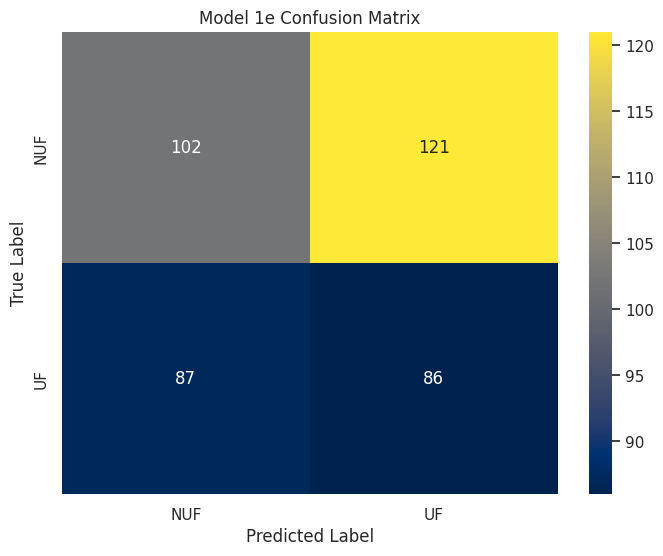

In [36]:
evaluate_model(model1, test_generator, ['NUF', 'UF'])
plot_confusion_matrix(model1d, test_generator, ['NUF', 'UF'],title="Model 1e Confusion Matrix")

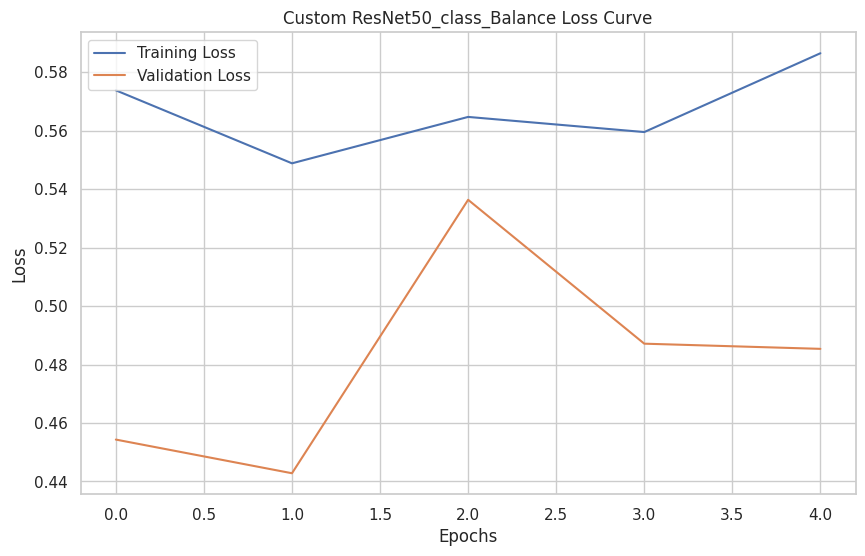

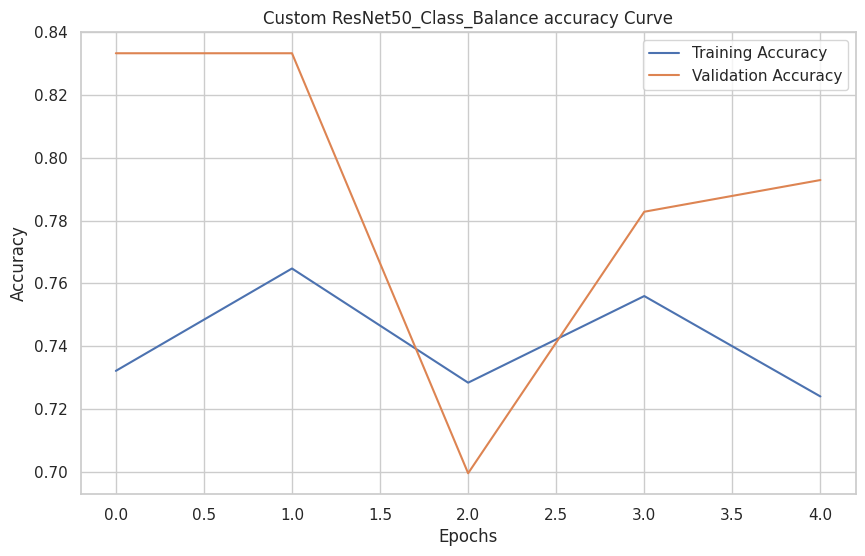

In [37]:
# Plot loss and accuracy curves
plot_loss_curve(history_class_bal, title='Custom ResNet50_class_Balance Loss Curve')
plot_accuracy_curve(history_class_bal,title='Custom ResNet50_Class_Balance accuracy Curve' )


In [38]:
# Train the model with class weights and callbacks
history_class_bal = model1d.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    class_weight=class_weight_dict,
    callbacks=[checkpoint]
)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 685ms/step - accuracy: 0.7447 - loss: 0.5504 - val_accuracy: 0.7551 - val_loss: 0.5082
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 595ms/step - accuracy: 0.7050 - loss: 0.5799 - val_accuracy: 0.6288 - val_loss: 0.5946
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 587ms/step - accuracy: 0.7275 - loss: 0.5757 - val_accuracy: 0.8283 - val_loss: 0.4678
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 591ms/step - accuracy: 0.7434 - loss: 0.5668 - val_accuracy: 0.6995 - val_loss: 0.5431
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 577ms/step - accuracy: 0.7409 - loss: 0.5618 - val_accuracy: 0.7929 - val_loss: 0.4916
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 615ms/step - accuracy: 0.7358 - loss: 0.5723 - val_accuracy: 0.8157 - val_loss: 0.4639
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 585ms/step - accuracy: 0.7356 - loss: 0.5543 - val_accuracy: 0.8510 - val_loss: 0.4608
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 620ms/step - accuracy: 0.7623 - loss: 0.5401 - val_accu

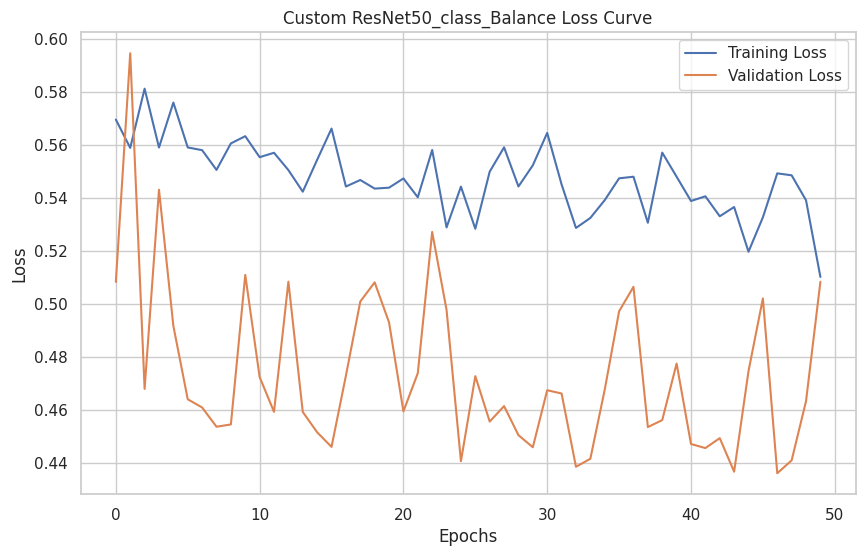

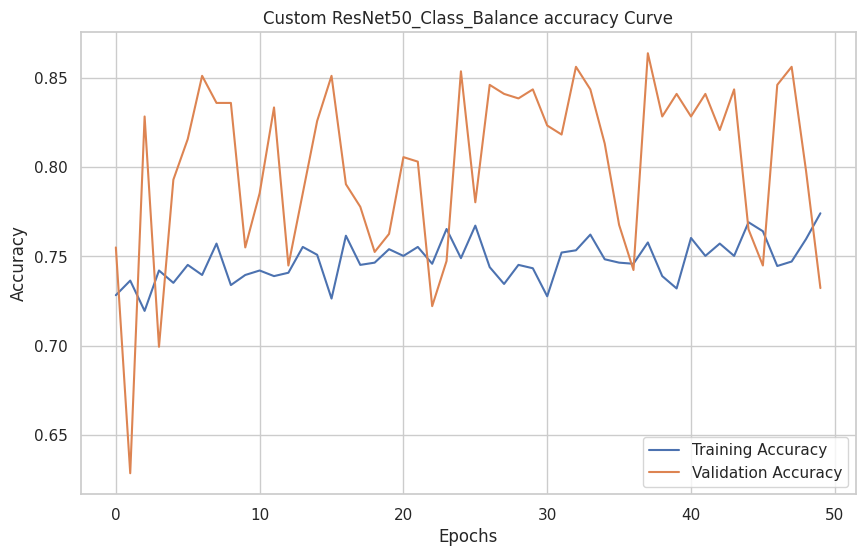

In [39]:
# Plot loss and accuracy curves
plot_loss_curve(history_class_bal, title='Custom ResNet50_class_Balance Loss Curve')
plot_accuracy_curve(history_class_bal,title='Custom ResNet50_Class_Balance accuracy Curve' )

Initiate MobileNet

In [40]:
# Make all necessary imports
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from sklearn.model_selection import train_test_split
from PIL import Image
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 1594 images belonging to 2 classes.
Found 396 images belonging to 2 classes.


In [41]:
# Load MobileNetV3 Large model without the top layer
mobilenet_v3_base = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in mobilenet_v3_base.layers:
    layer.trainable = False

# Add custom layers on top
model_with_top = Sequential([
    mobilenet_v3_base,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [42]:
# Compile the model
model_with_top.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

In [43]:
# Train the model
historyMob = model_with_top.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 64s 913ms/step - accuracy: 0.5120 - loss: 0.7263 - val_accuracy: 0.7424 - val_loss: 0.6689
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 58s 574ms/step - accuracy: 0.5104 - loss: 0.7100 - val_accuracy: 0.8283 - val_loss: 0.6371
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 601ms/step - accuracy: 0.5497 - loss: 0.6960 - val_accuracy: 0.7980 - val_loss: 0.6303
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 570ms/step - accuracy: 0.5716 - loss: 0.6762 - val_accuracy: 0.8232 - val_loss: 0.5955
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 557ms/step - accuracy: 0.5916 - loss: 0.6695 - val_accuracy: 0.7955 - val_loss: 0.6007
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 583ms/step - accuracy: 0.6123 - loss: 0.6521 - val_accuracy: 0.8662 - val_loss: 0.5774
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 556ms/step - accuracy: 0.6618 - loss: 0.6380 - val_accuracy: 0.8813 - val_loss: 0.5586
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 601ms/step - accuracy: 0.6302 - loss: 0.6471 - val_accuracy: 0.858

In [44]:
# Evaluate the model on the test data
loss, accuracy = model_with_top.evaluate(test_generator)
print(f'MobileNetV3 Large with Custom Enhancements Test Accuracy: {accuracy:.2f}')


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 290ms/step - accuracy: 0.8784 - loss: 0.4800
MobileNetV3 Large with Custom Enhancements Test Accuracy: 0.86


13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 568ms/step
Sensitivity (Recall): 0.53
Specificity: 0.48
Precision: 0.44
F1 Score: 0.48
Harmonic Mean of Precision and Recall: 0.48
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step


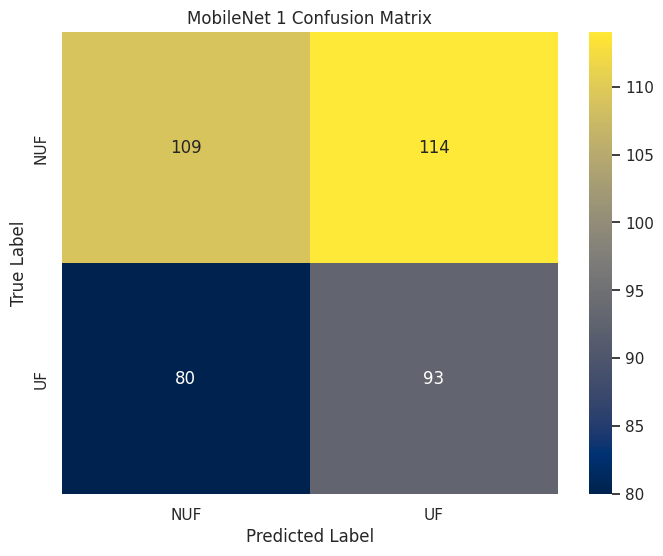

In [45]:
evaluate_model(model_with_top, test_generator, ['NUF', 'UF'])

plot_confusion_matrix(model_with_top, test_generator, ['NUF', 'UF'],title="MobileNet 1 Confusion Matrix")


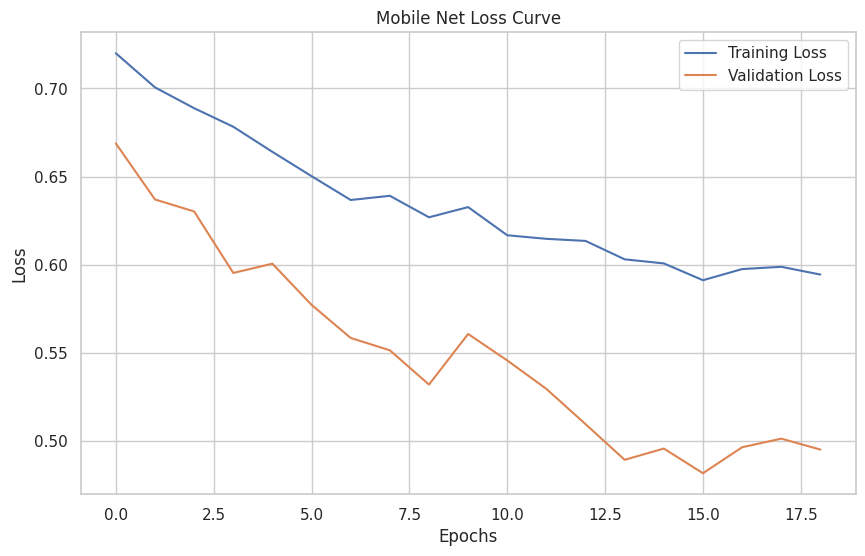

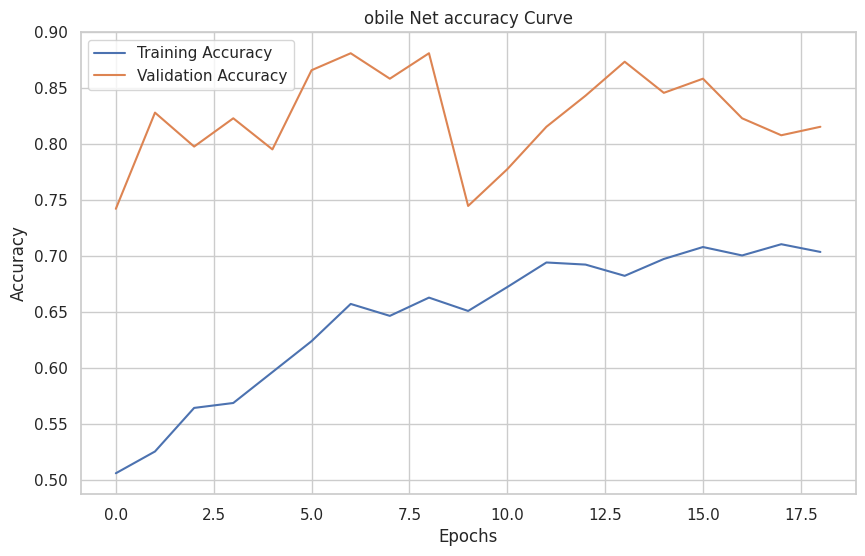

In [46]:
# Plot loss and accuracy curves
plot_loss_curve(historyMob, title='Mobile Net Loss Curve')
plot_accuracy_curve(historyMob,title='obile Net accuracy Curve' )

In [47]:
# Increase model complexity gradually
MobileNet2 = Sequential([
    mobilenet_v3_base,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
MobileNet2.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

In [48]:
# Train the model
historyMob_morcomplex = MobileNet2.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 59s 866ms/step - accuracy: 0.5106 - loss: 0.7515 - val_accuracy: 0.4369 - val_loss: 0.6964
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 64s 617ms/step - accuracy: 0.4810 - loss: 0.7408 - val_accuracy: 0.4369 - val_loss: 0.6884
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 653ms/step - accuracy: 0.5249 - loss: 0.7145 - val_accuracy: 0.4394 - val_loss: 0.6768
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 618ms/step - accuracy: 0.5381 - loss: 0.6999 - val_accuracy: 0.5455 - val_loss: 0.6668
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 641ms/step - accuracy: 0.5181 - loss: 0.7028 - val_accuracy: 0.4722 - val_loss: 0.6651
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 601ms/step - accuracy: 0.5292 - loss: 0.6972 - val_accuracy: 0.5909 - val_loss: 0.6515
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 647ms/step - accuracy: 0.5333 - loss: 0.7014 - val_accuracy: 0.8838 - val_loss: 0.6302
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 687ms/step - accuracy: 0.5454 - loss: 0.6920 - val_accu

In [49]:
# Evaluate the model on the test data
loss, accuracy = MobileNet2.evaluate(test_generator)
print(f'MobileNetV3 Large with Custom Enhancements Test Accuracy: {accuracy:.2f}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 268ms/step - accuracy: 0.8570 - loss: 0.4607
MobileNetV3 Large with Custom Enhancements Test Accuracy: 0.86


13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 584ms/step
Sensitivity (Recall): 0.48
Specificity: 0.44
Precision: 0.40
F1 Score: 0.44
Harmonic Mean of Precision and Recall: 0.44
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step


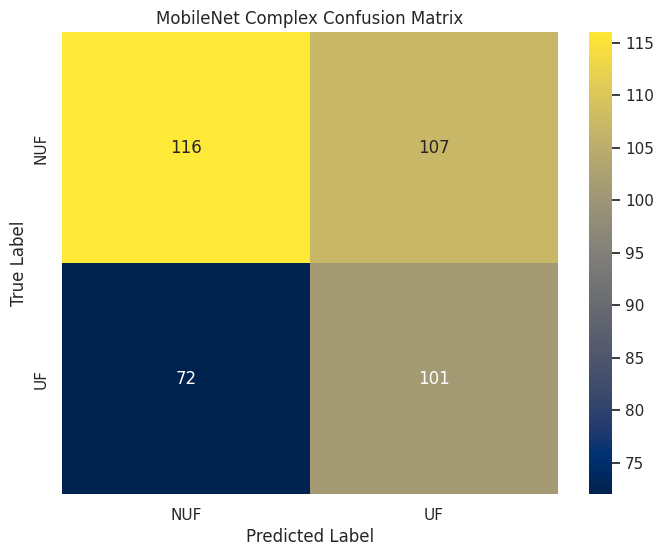

In [50]:
evaluate_model(MobileNet2, test_generator, ['NUF', 'UF'])
plot_confusion_matrix(MobileNet2, test_generator, ['NUF', 'UF'],title="MobileNet Complex Confusion Matrix")

In [51]:
# resplit into 70:30 and try with the best models, while balancing the dataset

import os
import shutil
import random
from math import ceil


In [52]:
import os
import shutil
import random
from math import ceil

# Define directories
train_directory = "/content/drive/MyDrive/UF_dataset/train"
test_directory = "/content/drive/MyDrive/UF_dataset/test"

# List classes
classes = os.listdir(train_directory)

for cls in classes:
    train_class_dir = os.path.join(train_directory, cls)
    test_class_dir = os.path.join(test_directory, cls)

    # List all files
    train_files = os.listdir(train_class_dir)
    test_files = os.listdir(test_class_dir)

    total_files = len(train_files) + len(test_files)
    target_train_count = ceil(total_files * 0.7)
    current_train_count = len(train_files)
    files_to_move = current_train_count - target_train_count

    if files_to_move > 0:
        files_to_move = random.sample(train_files, files_to_move)

        for file_name in files_to_move:
            source = os.path.join(train_class_dir, file_name)
            destination = os.path.join(test_class_dir, file_name)
            shutil.move(source, destination)

    elif files_to_move < 0:
        files_to_move = random.sample(test_files, -files_to_move)

        for file_name in files_to_move:
            source = os.path.join(test_class_dir, file_name)
            destination = os.path.join(train_class_dir, file_name)
            shutil.move(source, destination)

# Verify the new split
for cls in classes:
    train_class_dir = os.path.join(train_directory, cls)
    test_class_dir = os.path.join(test_directory, cls)

    train_count = len(os.listdir(train_class_dir))
    test_count = len(os.listdir(test_class_dir))

    print(f"Class: {cls}, Train: {train_count}, Test: {test_count}, Ratio: {train_count / (train_count + test_count):.2f}")


Class: UF, Train: 613, Test: 262, Ratio: 0.70
Class: NUF, Train: 781, Test: 334, Ratio: 0.70


In [1]:
# Load pre-trained ResNet50 model (without top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1, activation='sigmoid')(x)

# Create model
model1 = tf.keras.Model(inputs=base_model.input, outputs=x)

# Compile model
model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model1.summary()

# Train the model
historyRes = model1.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

# Evaluate the model
loss, accuracy = model1.evaluate(test_generator)
print(f'ResNet50 Test Accuracy: {accuracy:.2f}')

# increase epochs and introduce dropout

# Compile model
model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model1.summary()

# Set up EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Train the model with callback
historyRes_layer_Lr = model1.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model1.evaluate(test_generator)
print(f'ResNet50 Test Accuracy: {accuracy:.2f}')


NameError: name 'ResNet50' is not defined

In [54]:
# Train again with the MobileNet
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
data_directory = "/content/drive/MyDrive/UF_dataset"
train_directory = "/content/drive/MyDrive/UF_dataset/train"
test_directory = "/content/drive/MyDrive/UF_dataset/test"

# Create an ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


# Train the model
historyMob_Class_Bal = MobileNet2.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    class_weight=class_weight_dict,
    callbacks=[early_stopping]
)


Found 1394 images belonging to 2 classes.
Found 596 images belonging to 2 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 2/44 ━━━━━━━━━━━━━━━━━━━━ 25s 605ms/step - accuracy: 0.8047 - loss: 0.5109

KeyboardInterrupt: 

In [ ]:
# Evaluate the model on the test data
loss, accuracy = MobileNet2.evaluate(test_generator)
print(f'MobileNetV3 Large with Custom Enhancements_resplit Test Accuracy: {accuracy:.2f}')

In [ ]:
evaluate_model(MobileNet2, test_generator, ['NUF', 'UF'])
plot_confusion_matrix(MobileNet2, test_generator, ['NUF', 'UF'],title="MobileNet Complex Confusion Matrix")